# Description of attributes:

Data Set Information:
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is an adaptive learning routine that generates and executes digital analogy of perceptron-like devices. It is a unique algorithm; see the paper for details.
Attribute Information:
Number of times pregnant 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 3. Diastolic blood pressure (mm Hg) 4. Triceps skin fold thickness (mm) 5. 2-Hour serum insulin (mu U/ml) 6. Body mass index (weight in kg/(height in m)^2) 7. Diabetes pedigree function 8. Age (years) 9. Class variable (0 or 1) **
UPDATE:
Until 02/28/2011 this web page indicated that there were no missing values in the dataset. As pointed out by a repository user, this cannot be true: there are zeros in places where they are biologically impossible, such as the blood pressure attribute. It seems very likely that zero values encode missing data. However, since the dataset donors made no such statement we encourage you to use your best judgement and state your assumptions.

You need to do exploratory data analysis on the given dataset and share your insights.
 
## Major Steps

1.	Load  the dataset.
2.	Understand the structure of dataset.
3.	Plot various graphs to explore the dataset.
4.	Use descriptive statistics elements to describe the dataset.
5.	Find relationship between various attributes.
6.	State your insights from the dataset.
Apply the concepts and techniques you have learnt in last 3 weeks to explore the distributions, correlations, outliers, missing values etc and summarise your insights at the end.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,Skin,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Descriptive Statistics

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Skin,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above output by describe method, we can infer below points:

1. As mentioned in the problem description, value zero can be reffered as missing values
   minimum value shows as zero in all feature except DiabetesPedigreeFunction and Age.
   So, based on that, only except Pregnancies feature, we have missing values in Glucose, insulin, blood pressure, Skin thickness, BMI

2. Value zero, seems to be outlier in case of below features as mean is bit high.
    
   Glucose, BloodPressure, Insulin

# Handling Missing Values

We will first see how many missing values are present in each feature.
In our dataset zero seems to be missing value, so we will take a count on zero values

In [5]:
(df[['Pregnancies','Glucose','BloodPressure','Skin','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
Skin                        227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

We could see zeros values in each feature, Pregnancies can be ignored as

Let's see the boxplots to measure the central tendencies of each feature.

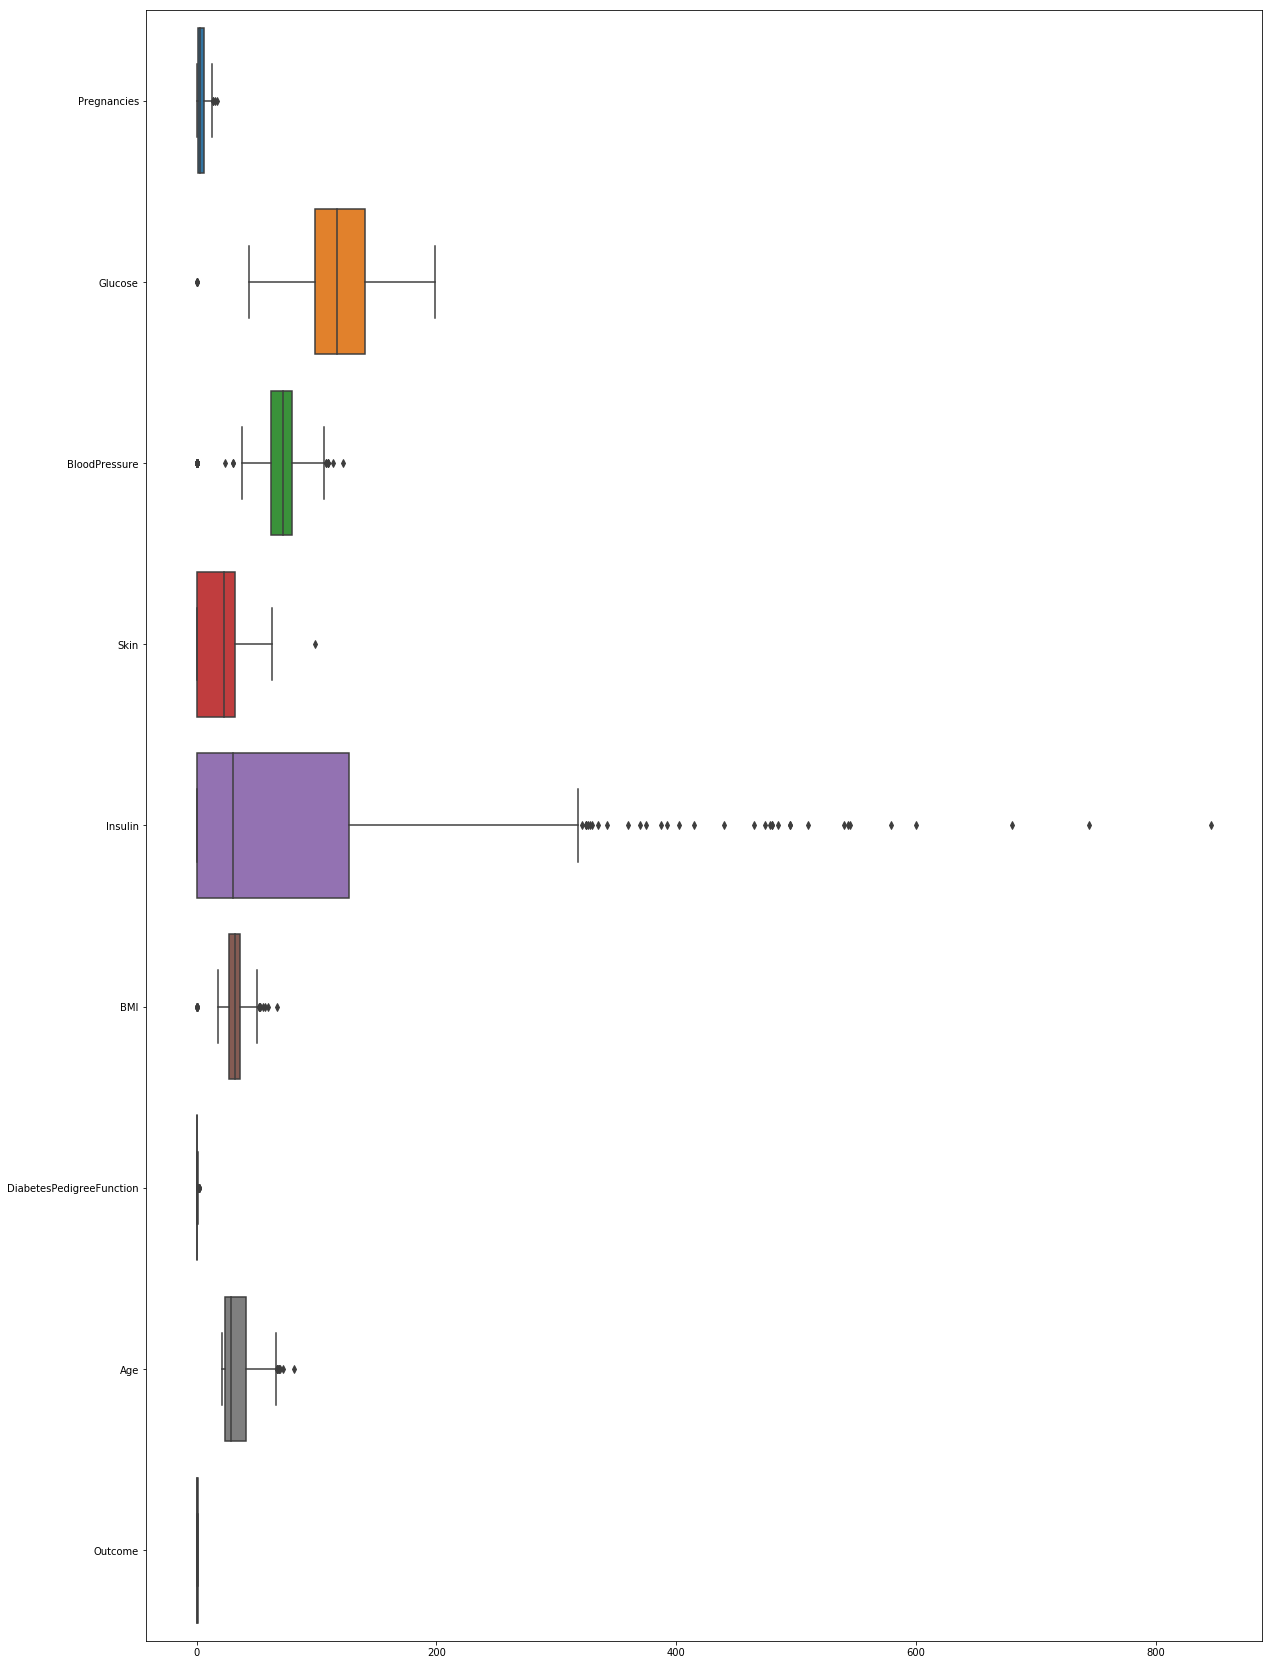

In [6]:
fig, ax = plt.subplots(figsize=(20,  30))
sns.boxplot(data=df.iloc[:], orient='h')

From the Box Plot above, we could infer below points:

1. Feature Glucose, BloodPressure and BMI seems to be normally distributed
2. We can see left skewness of data in Skinthickness
3. We can see right skewness of data in Age, Insulin and Pregnancies

Now, we will impute values in missing/zero values:

    Our Approach will be, first we will impute 'NaN' value on the missing/zero values, then we will impute mean/median/mode.
    If we are seeing skewness/ with significant outliers, we will impute median value. So median value will be imputed in Skinthickness, Age, Insulin
    Data which are not skewed, we will impute mean value. So mean value will be imputed in Glucose, BloodPressure and BMI

1. Replacing zeros with NaN value

In [7]:
df[['Glucose','BloodPressure','Skin','Insulin','BMI']]
df[['Glucose','BloodPressure','Skin','Insulin','BMI']] = df[['Glucose','BloodPressure','Skin','Insulin','BMI']].replace(0, np.NaN)

In [8]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
Skin                        227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Let's see values first in our dataset

In [9]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,Skin,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [10]:
#df['SkinThickness'].median()

In [11]:
#df[['Glucose', 'BloodPressure','BMI']]=df[['Glucose', 'BloodPressure','BMI']].fillna(df[['Glucose', 'BloodPressure','BMI']].mean(), inplace=True)

In [12]:
#df[['Skin']]=df[['Skin']].fillna(df[['Skin']].median(), inplace=True)

2. Filling Mean/Median values

In [13]:
df_imputed = df.fillna({'Glucose':df['Glucose'].mean(),
           'BloodPressure':df['BloodPressure'].mean(),
           'Skin':df['Skin'].median(),
           'Insulin':df['Insulin'].median(),
           'BMI':df['BMI'].mean()})

Let's verify after imputing values

In [14]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,Skin,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


# Data Balance Check

Now we will see how our dependent variable is distributed in our dataset

In [15]:
(df['Outcome'].sum()/df['Outcome'].count())*100

34.89583333333333

Let's visualize the Outcome counts

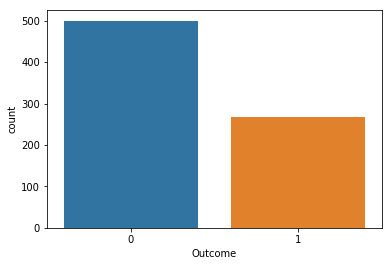

In [16]:
sns.countplot("Outcome",data=df)

from above calculation we could see approx 35(1)-65(0) % of outcomes in our dataset, which is kind of fine if we put directly this dataset into our model.

# Visualization

first we will plot pairplot graph and see how each features are distributed in our dataset

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


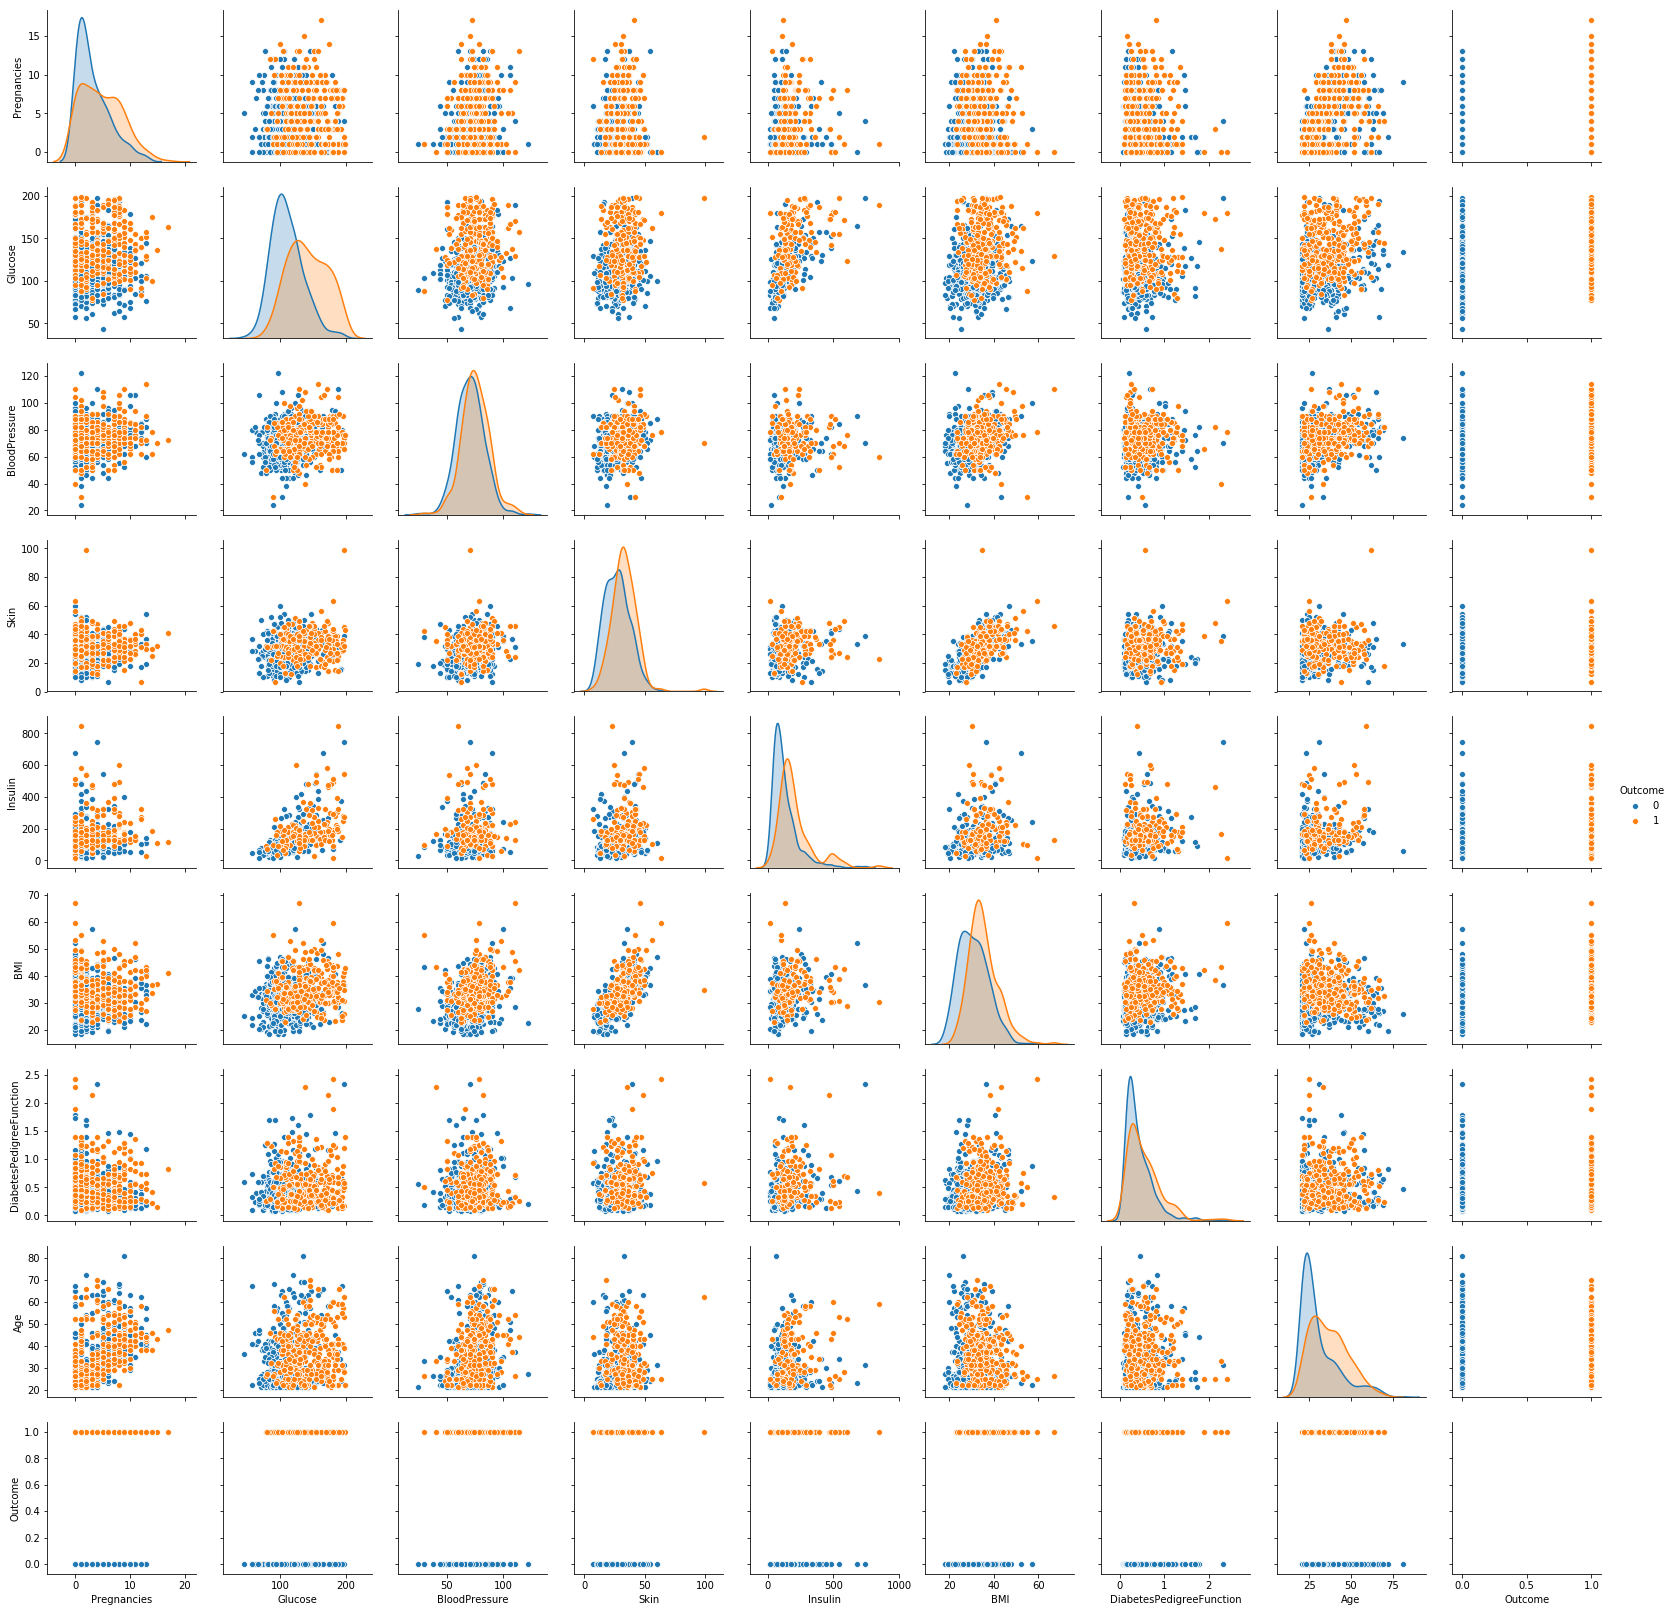

In [17]:
sns.pairplot(df, hue='Outcome')

In Above, Pairplot we can see that BMI and skin thickness is Linear in nature

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Skin', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

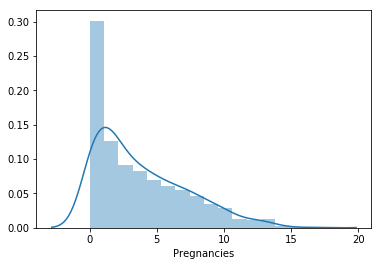

In [19]:
sns.distplot(df_imputed['Pregnancies'])

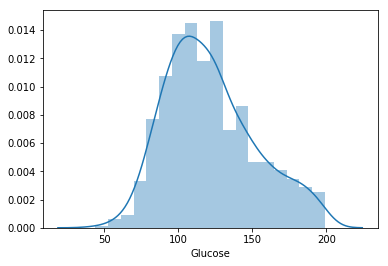

In [20]:
sns.distplot(df_imputed['Glucose'])

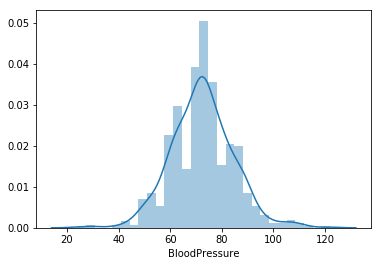

In [21]:
sns.distplot(df_imputed['BloodPressure'])

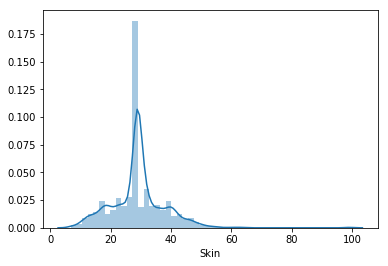

In [22]:
sns.distplot(df_imputed['Skin'])

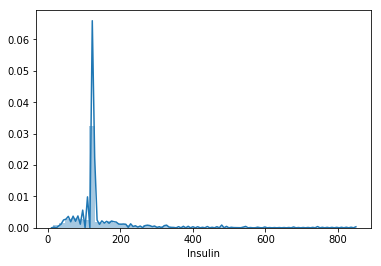

In [23]:
sns.distplot(df_imputed['Insulin'])

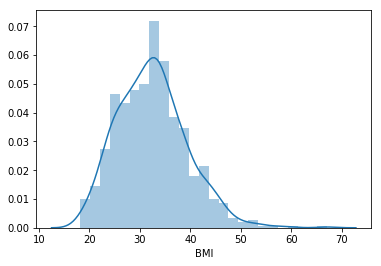

In [24]:
sns.distplot(df_imputed['BMI'])

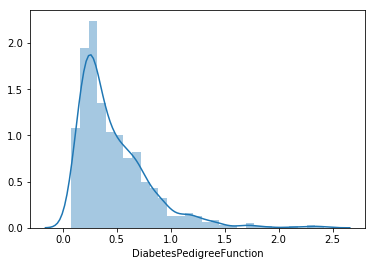

In [25]:
sns.distplot(df_imputed['DiabetesPedigreeFunction'])

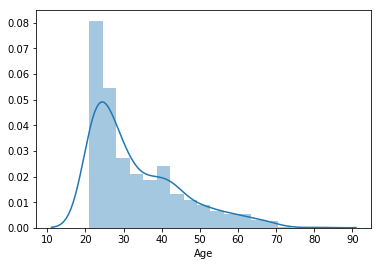

In [26]:
sns.distplot(df_imputed['Age'])

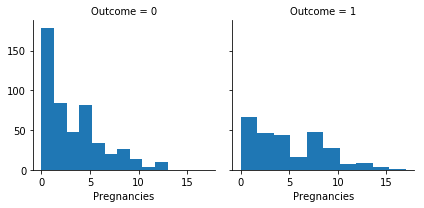

In [27]:
g = sns.FacetGrid(df_imputed, col = "Outcome")
g.map(plt.hist, "Pregnancies")

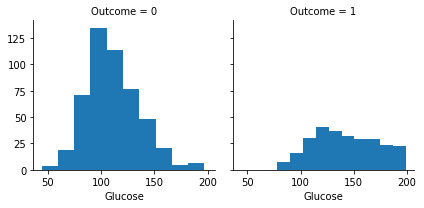

In [28]:
g = sns.FacetGrid(df_imputed, col = "Outcome")
g.map(plt.hist, "Glucose")

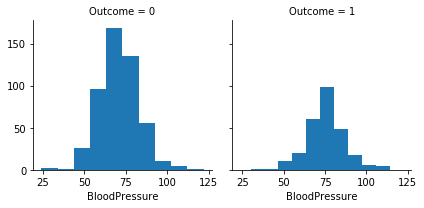

In [29]:
g = sns.FacetGrid(df_imputed, col = "Outcome")
g.map(plt.hist, "BloodPressure")

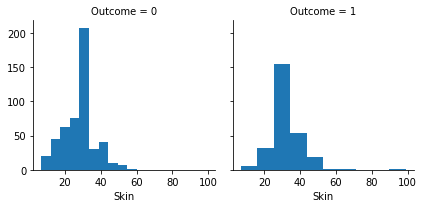

In [30]:
g = sns.FacetGrid(df_imputed, col = "Outcome")
g.map(plt.hist, "Skin")

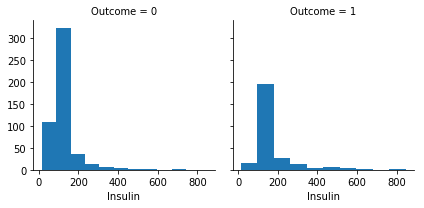

In [31]:
g = sns.FacetGrid(df_imputed, col = "Outcome")
g.map(plt.hist, "Insulin")

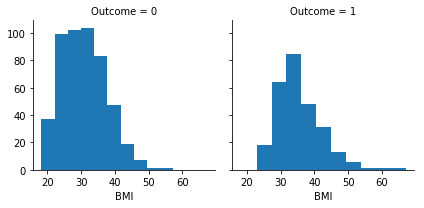

In [32]:
g = sns.FacetGrid(df_imputed, col = "Outcome")
g.map(plt.hist, "BMI")

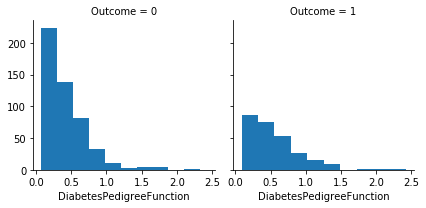

In [33]:
g = sns.FacetGrid(df_imputed, col = "Outcome")
g.map(plt.hist, "DiabetesPedigreeFunction")

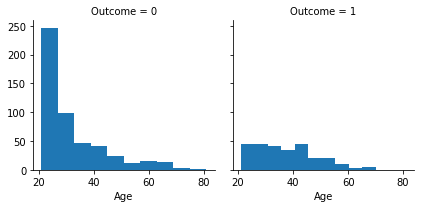

In [34]:
g = sns.FacetGrid(df_imputed, col = "Outcome")
g.map(plt.hist, "Age")

# Visualize Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B815E09B00>,
      dtype=object)

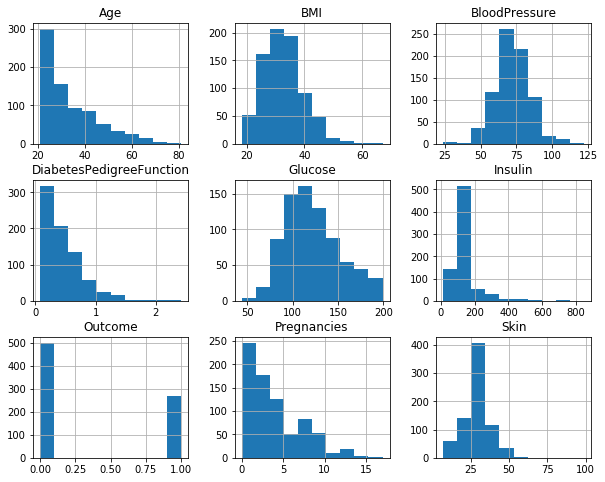

In [35]:
#plt.figure(figsize = (10, 80)) 
df_imputed.hist(figsize = (10, 8)) 

Based on above histogram, we could see

Feature Glucose, BloodPressure and BMI seems to be normally distributed
We can see left skewness of data in Skinthickness
We can see right skewness of data in Age, Insulin and Pregnancies

In [36]:
def plot_hist(col):

        plt.hist(df_imputed[df_imputed['Outcome']==0][col],alpha=0.6, label='NonDiabetic')
        plt.hist(df_imputed[df_imputed['Outcome']==1][col],alpha=0.6, label='Diabetic')
        plt.legend()
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title('Histogram of {}'.format(col))

        return plt.show()

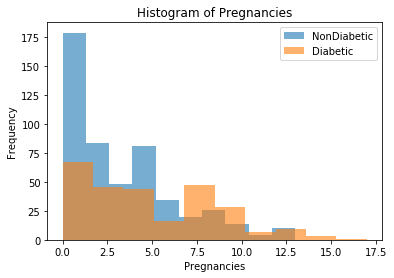

In [37]:
plot_hist('Pregnancies')

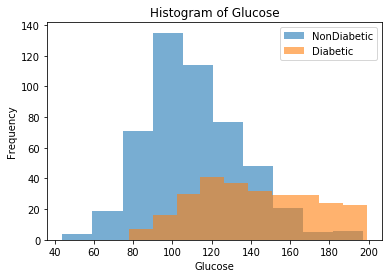

In [38]:
plot_hist('Glucose')

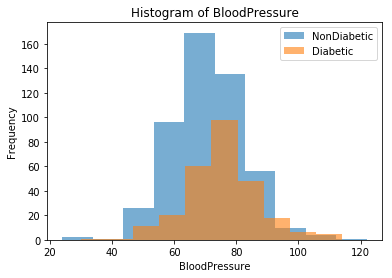

In [39]:
plot_hist('BloodPressure')

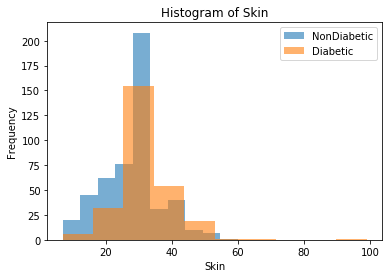

In [40]:
plot_hist('Skin')

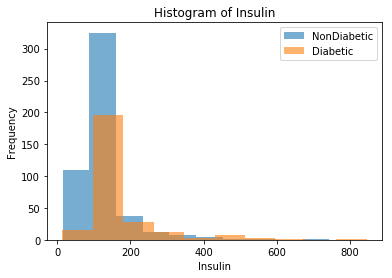

In [41]:
plot_hist('Insulin')

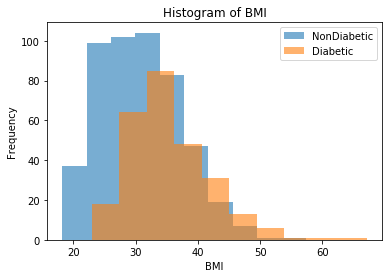

In [42]:
plot_hist('BMI')

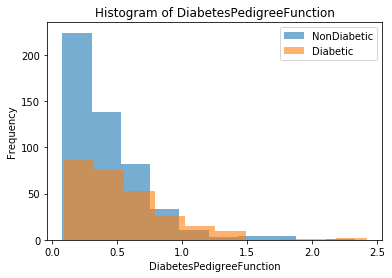

In [43]:
plot_hist('DiabetesPedigreeFunction')

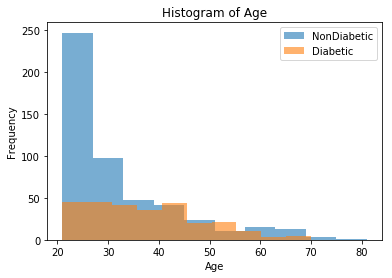

In [44]:
plot_hist('Age')

Based on the histogram, We could see that 'Glucose' feature increases for diabetic Person

# Measure Correlation

In [45]:
corr = df_imputed.corr()

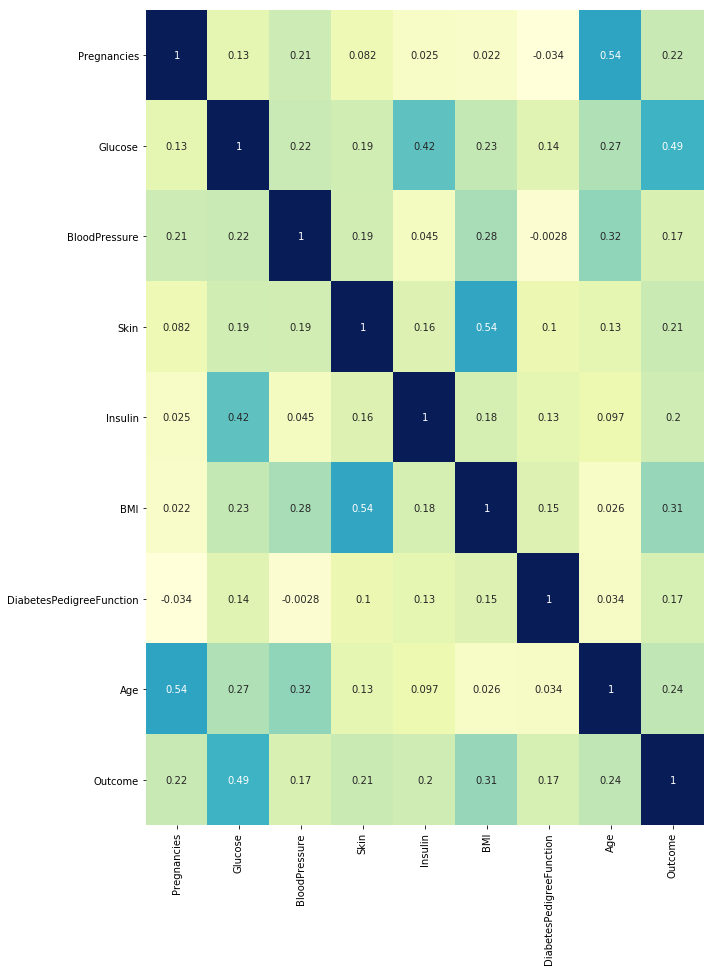

In [46]:
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(corr, annot=True, cbar=False,cmap="YlGnBu")

Correlation tells us how close 2 variables are to having linear relationship with each other
from above heatmap visualization of correlation matrix, we could infer as below:
    1. All features are not highly correlated with each other
    2. Preganancies and Age are having correlation of 0.54
    3. Glucose and Outcome are correlated with each other by 0.47 correlation coefficient value
    4. Skinthickness and Insulin are correlated with each other by 0.44 correlation coefficient value
  
Let's evaluate correlation of all features with our outcome variable

In [47]:
df_imputed.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492928
BloodPressure               0.166074
Skin                        0.214873
Insulin                     0.203790
BMI                         0.311924
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

# Summary:
from above visual plots and statistical analysis, we could infer among all the features, Glucose is more lineraly correlated with Outcome variable
Also we could infer that more the BMI and Age of the person, more chances of having Diabetes.